Exam Scores: [69 66 75 77 73 70 75 67 69 72 65 69]

--- One-Sample t-Test Results ---
Sample Mean      = 70.58
Hypothesized μ   = 65
t-Statistic      = 5.057
Degrees of Freedom = 11
p-Value          = 0.0004

95% Confidence Interval for Mean = (np.float64(68.1531968659404), np.float64(73.01346980072626))

Decision: Reject H0 (The sample mean is significantly different from 65).


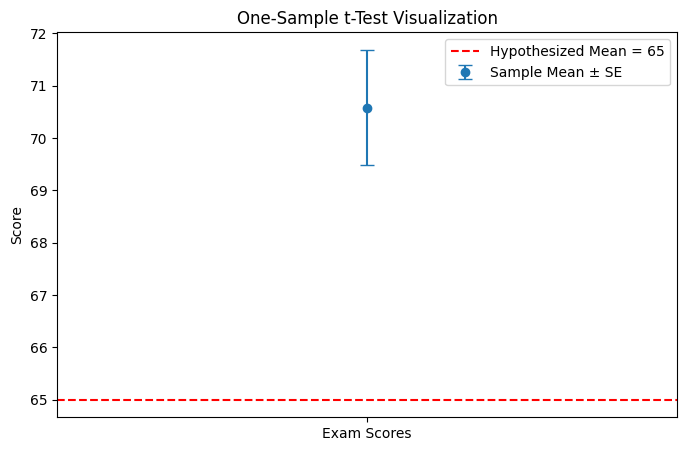

In [1]:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

k = 23

np.random.seed(42)
exam_scores = 60 + np.random.randint(0, 15, size=12) + (k % 5)

print("Exam Scores:", exam_scores)

mu_0 = 65

t_stat, p_value = stats.ttest_1samp(exam_scores, mu_0)
sample_mean = np.mean(exam_scores)
sample_std = np.std(exam_scores, ddof=1)
n = len(exam_scores)
df = n - 1
print("\n--- One-Sample t-Test Results ---")
print(f"Sample Mean      = {sample_mean:.2f}")
print(f"Hypothesized μ   = {mu_0}")
print(f"t-Statistic      = {t_stat:.3f}")
print(f"Degrees of Freedom = {df}")
print(f"p-Value          = {p_value:.4f}")


confidence = 0.95
alpha = 0.05

ci = stats.t.interval(
    confidence,
    df,
    loc=sample_mean,
    scale=stats.sem(exam_scores)
)

print(f"\n95% Confidence Interval for Mean = {ci}")


if p_value < alpha:
    decision = "Reject H0 (The sample mean is significantly different from 65)."
else:
    decision = "Fail to Reject H0 (No significant difference from 65)."

print("\nDecision:", decision)

plt.figure(figsize=(8,5))

plt.errorbar(1, sample_mean, yerr=stats.sem(exam_scores), fmt='o', capsize=5, label="Sample Mean ± SE")

plt.axhline(y=mu_0, color='r', linestyle='--', label=f"Hypothesized Mean = {mu_0}")

plt.xticks([1], ["Exam Scores"])
plt.ylabel("Score")
plt.title("One-Sample t-Test Visualization")
plt.legend()
plt.show()
